# Part I - Loan Data From Prosper
## by Roseland Ambuku

## Introduction
Loans Data From Prosper is a dataset with 113,937 records of loans with 81 variables. The variables in the dataset include Loan Status, Listing Category, Borrower State and many more. The records belong to Prosper Bank that issues loans and other banking services to its clients. In this analysis we shall focus on the loan aspect of Prosper Bank's service delivery.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Converting the csv file to a pandas dataframe
df_data = pd.read_csv('prosperLoanData.csv')

In [3]:
#Checking the information of the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#Checking the rows and columns of the dataset
df_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
#Checking the number of rows and columns of the dataset
df_data.shape

(113937, 81)

In [6]:
#Checking the datatypes of the values in the dataset
print(df_data.dtypes)

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


### Data Cleaning
##### The following are some of the steps that shall be carried out:
1. Choosing the subset of features(variables) that are important in the study. 
2. Dropping duplicate values in the dataset
3. Converting the following datatypes: , TotalInquires and  to int.
4. Fill in the missing values of Occupation and DebtToIncomeRatio and EmploymentStatus.
5. Replacing the null values in ProsperScore with the mode
6. Replacing the missing values in the columns below with median values;CurrentDelinquencies,TotalInquiries,InquiriesLast6Months,CurrentCreditLines,OpenCreditLines,AmountDelinquent,DelinquenciesLast7Years,BankcardUtilization,RevolvingCreditBalance.

In [7]:
#Choosing the subset of features for the study
columns = ['StatedMonthlyIncome','LoanStatus','DebtToIncomeRatio','EmploymentStatus','Recommendations','IncomeVerifiable',
           'ProsperScore','IsBorrowerHomeowner','Occupation','OpenRevolvingAccounts','OpenRevolvingMonthlyPayment',
           'CurrentCreditLines','OpenCreditLines','AmountDelinquent','DelinquenciesLast7Years','BankcardUtilization',
           'RevolvingCreditBalance','CurrentDelinquencies','OpenRevolvingAccounts','TotalInquiries','InquiriesLast6Months',
           'LoanOriginalAmount','LoanCurrentDaysDelinquent']
df_loans = df_data[columns]

In [8]:
#Checking the information of the subset dataset
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   StatedMonthlyIncome          113937 non-null  float64
 1   LoanStatus                   113937 non-null  object 
 2   DebtToIncomeRatio            105383 non-null  float64
 3   EmploymentStatus             111682 non-null  object 
 4   Recommendations              113937 non-null  int64  
 5   IncomeVerifiable             113937 non-null  bool   
 6   ProsperScore                 84853 non-null   float64
 7   IsBorrowerHomeowner          113937 non-null  bool   
 8   Occupation                   110349 non-null  object 
 9   OpenRevolvingAccounts        113937 non-null  int64  
 10  OpenRevolvingMonthlyPayment  113937 non-null  float64
 11  CurrentCreditLines           106333 non-null  float64
 12  OpenCreditLines              106333 non-null  float64
 13 

In [9]:
#Checking random rows of the dataset 
df_loans.sample(10)

,StatedMonthlyIncome,LoanStatus,DebtToIncomeRatio,EmploymentStatus,Recommendations,IncomeVerifiable,ProsperScore,IsBorrowerHomeowner,Occupation,OpenRevolvingAccounts,...,AmountDelinquent,DelinquenciesLast7Years,BankcardUtilization,RevolvingCreditBalance,CurrentDelinquencies,OpenRevolvingAccounts,TotalInquiries,InquiriesLast6Months,LoanOriginalAmount,LoanCurrentDaysDelinquent
102566,4333.333333,Current,0.32,Full-time,0,True,2.0,True,Teacher,8,...,2336.0,6.0,0.96,14955.0,2.0,8,2.0,0.0,4000,0
32374,6500.000000,Current,0.28,Employed,0,True,7.0,False,Sales - Commission,3,...,0.0,4.0,0.96,22755.0,1.0,3,9.0,0.0,15000,0
29629,4000.000000,Past Due (16-30 days),NaN,Employed,0,False,3.0,False,Other,10,...,0.0,0.0,0.35,27848.0,0.0,10,7.0,0.0,4000,21
53946,3933.333333,Completed,0.32,Employed,0,True,5.0,True,Other,6,...,0.0,0.0,0.56,7770.0,0.0,6,3.0,1.0,9500,0
56185,4750.000000,Current,0.13,Employed,0,True,4.0,False,Computer Programmer,3,...,0.0,0.0,0.77,3036.0,0.0,3,3.0,0.0,3000,0
98332,8916.666667,Current,0.14,Employed,0,True,10.0,True,Professional,13,...,0.0,0.0,0.31,22235.0,0.0,13,1.0,0.0,22000,0
33637,5000.000000,Current,0.34,Other,0,True,3.0,True,NaN,7,...,0.0,0.0,0.77,59442.0,0.0,7,11.0,0.0,10000,0
53631,1891.666667,Completed,0.65,Full-time,0,True,NaN,False,Other,7,...,72.0,0.0,0.24,2515.0,1.0,7,7.0,1.0,3500,0
46439,6500.000000,Current,0.41,Employed,0,True,4.0,False,Executive,9,...,0.0,0.0,0.49,22091.0,0.0,9,8.0,3.0,15000,0
80659,7750.000000,Current,0.40,Employed,0,True,7.0,True,Nurse (RN),21,...,0.0,0.0,0.37,33007.0,0.0,21,1.0,0.0,10000,0


In [10]:
#dropping duplicates in the dataset
df_loans = df_loans.drop_duplicates()

In [11]:
#filling in missing values of DebttoIncome using the mean value of the column
df_loans.DebtToIncomeRatio = df_loans.DebtToIncomeRatio.fillna(df_loans.DebtToIncomeRatio.mean())

In [12]:
#filling in the missing values in Occupation with unknown
df_loans.Occupation = df_loans.Occupation.fillna('Unknown')

In [13]:
#filling in the missing values in EmploymentStatus with unknown
df_loans.EmploymentStatus = df_loans.EmploymentStatus.fillna('Unknown')

In [14]:
#Replacing the null values in ProsperScore with the mode
df_loans.ProsperScore = df_loans.ProsperScore.fillna(df_loans.ProsperScore.mode()[0])

In [15]:
#Replacing the missing values in the columns below with median values since the data distribution is skewed to the right
df_loans[['CurrentDelinquencies','TotalInquiries','InquiriesLast6Months','CurrentCreditLines','OpenCreditLines','AmountDelinquent','DelinquenciesLast7Years','BankcardUtilization','RevolvingCreditBalance']] = df_loans[['CurrentDelinquencies','TotalInquiries','InquiriesLast6Months','CurrentCreditLines','OpenCreditLines','AmountDelinquent','DelinquenciesLast7Years','BankcardUtilization','RevolvingCreditBalance']].fillna(df_loans[['CurrentDelinquencies','TotalInquiries','InquiriesLast6Months','CurrentCreditLines','OpenCreditLines','AmountDelinquent','DelinquenciesLast7Years','BankcardUtilization','RevolvingCreditBalance']].median())

In [16]:
#Converting the necessary columns to int datatypes
df_loans.DelinquenciesLast7Years = df_loans.DelinquenciesLast7Years.astype('Int64')
df_loans.AmountDelinquent = df_loans.AmountDelinquent.astype('Int64')
df_loans.ProsperScore = df_loans.ProsperScore.astype('Int64')
df_loans.CurrentDelinquencies = df_loans.CurrentDelinquencies.astype('Int64')
df_loans.RevolvingCreditBalance = df_loans.RevolvingCreditBalance.astype('Int64')
df_loans.OpenRevolvingMonthlyPayment = df_loans.OpenRevolvingMonthlyPayment.astype('Int64')
df_loans. CurrentCreditLines= df_loans.CurrentCreditLines.astype('Int64')
df_loans.OpenCreditLines = df_loans.OpenCreditLines.astype('Int64')
df_loans.InquiriesLast6Months= df_loans.InquiriesLast6Months.astype('Int64')
df_loans.TotalInquiries = df_loans.TotalInquiries.astype('Int64')


In [17]:
#Checking the dataset 
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   StatedMonthlyIncome          113937 non-null  float64
 1   LoanStatus                   113937 non-null  object 
 2   DebtToIncomeRatio            113937 non-null  float64
 3   EmploymentStatus             113937 non-null  object 
 4   Recommendations              113937 non-null  int64  
 5   IncomeVerifiable             113937 non-null  bool   
 6   ProsperScore                 113937 non-null  Int64  
 7   IsBorrowerHomeowner          113937 non-null  bool   
 8   Occupation                   113937 non-null  object 
 9   OpenRevolvingAccounts        113937 non-null  int64  
 10  OpenRevolvingMonthlyPayment  113937 non-null  Int64  
 11  CurrentCreditLines           113937 non-null  Int64  
 12  OpenCreditLines              113937 non-null  Int64  
 13 

In [18]:
df_loans.sample(10)

,StatedMonthlyIncome,LoanStatus,DebtToIncomeRatio,EmploymentStatus,Recommendations,IncomeVerifiable,ProsperScore,IsBorrowerHomeowner,Occupation,OpenRevolvingAccounts,...,AmountDelinquent,DelinquenciesLast7Years,BankcardUtilization,RevolvingCreditBalance,CurrentDelinquencies,OpenRevolvingAccounts,TotalInquiries,InquiriesLast6Months,LoanOriginalAmount,LoanCurrentDaysDelinquent
22399,1666.666667,Completed,0.275947,Unknown,0,True,4,False,Unknown,0,...,0,0,0.60,8549,0,0,0,1,3001,0
34056,7083.333333,Completed,0.110000,Full-time,0,True,4,True,Executive,8,...,0,17,0.48,2761,0,8,13,9,3500,0
77533,2900.000000,Defaulted,0.610000,Employed,0,True,6,False,Laborer,6,...,0,1,0.57,17930,0,6,4,1,11750,501
55230,12500.000000,Current,0.290000,Employed,0,True,10,True,Professional,8,...,0,0,0.80,79622,0,8,5,0,15000,0
26580,5850.000000,Chargedoff,0.470000,Full-time,0,True,4,True,Principal,5,...,0,2,0.19,2023,0,5,21,6,9700,2055
78934,7688.416667,Completed,0.170000,Full-time,0,True,7,True,Professor,20,...,0,0,0.65,45554,0,20,7,2,10000,0
56678,14416.666667,Current,0.170000,Employed,0,True,8,True,Other,13,...,0,0,0.99,47769,0,13,4,0,25000,0
44316,10000.000000,Current,0.500000,Employed,0,True,10,True,Attorney,14,...,0,0,0.67,152382,0,14,4,1,15000,0
25413,3166.666667,Completed,0.300000,Full-time,0,True,4,True,Clerical,8,...,0,0,0.66,8681,0,8,11,1,5000,0
100412,4666.666667,Current,0.160000,Employed,0,True,10,True,Truck Driver,3,...,0,0,0.44,15533,0,3,6,0,15000,0


In [19]:
df_loans.describe()

,StatedMonthlyIncome,DebtToIncomeRatio,Recommendations,ProsperScore,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,CurrentCreditLines,OpenCreditLines,AmountDelinquent,DelinquenciesLast7Years,BankcardUtilization,RevolvingCreditBalance,CurrentDelinquencies,OpenRevolvingAccounts,TotalInquiries,InquiriesLast6Months,LoanOriginalAmount,LoanCurrentDaysDelinquent
count,1.139370e+05,113937.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,1.139370e+05,113937.000000,113937.00000,113937.000000,113937.000000,113937.00000,113937.000000
mean,5.608026e+03,0.275947,0.048027,5.452285,6.96979,398.292161,10.296023,9.242801,918.646866,4.118881,0.563891,1.699474e+04,0.588430,6.96979,5.568288,1.432423,8337.01385,152.816539
std,7.478497e+03,0.530643,0.332353,2.220136,4.63097,447.159711,5.273189,4.852581,6919.065398,10.123325,0.307278,3.189841e+04,1.973185,4.63097,6.399133,2.430277,6245.80058,466.320254
min,0.000000e+00,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,1000.00000,0.000000
25%,3.200333e+03,0.150000,0.000000,4.000000,4.00000,114.000000,7.000000,6.000000,0.000000,0.000000,0.330000,3.459000e+03,0.000000,4.00000,2.000000,0.000000,4000.00000,0.000000
50%,4.666667e+03,0.230000,0.000000,5.000000,6.00000,271.000000,10.000000,9.000000,0.000000,0.000000,0.600000,8.549000e+03,0.000000,6.00000,4.000000,1.000000,6500.00000,0.000000
75%,6.825000e+03,0.310000,0.000000,7.000000,9.00000,525.000000,13.000000,12.000000,0.000000,3.000000,0.820000,1.825400e+04,0.000000,9.00000,7.000000,2.000000,12000.00000,0.000000
max,1.750003e+06,10.010000,39.000000,11.000000,51.00000,14985.000000,59.000000,54.000000,463881.000000,99.000000,5.950000,1.435667e+06,83.000000,51.00000,379.000000,105.000000,35000.00000,2704.000000


### What is the structure of your dataset?

The dataset has 113,937 records and 23 features which will be explored in the study.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are DebtToIncome Ratio and Stated Monthly Income which will assist in determing the LoanStatus. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that will help support the investigation into what determines the status of a loan include Occupation, EmploymentStatus, IncomeVerifiable and CurrentDelinquiencies

## Univariate Exploration

### DebtToIncomeRatio distribution

What is the preferred Debt to Income Ratio of Prosper Bank clients? 

Text(0.5, 1.0, 'Distribution of Debt to Income Ratio')

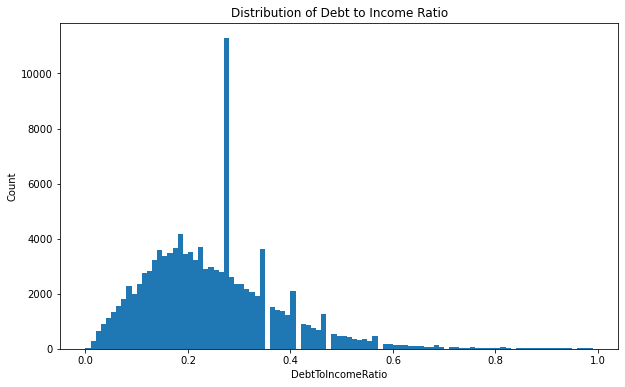

In [20]:
bins = np.arange(0,1,0.01)
plt.figure(figsize=[10,6])
plt.hist(data=df_loans,x='DebtToIncomeRatio',bins=bins);
plt.xlabel('DebtToIncomeRatio'); 
plt.ylabel('Count')
plt.title('Distribution of Debt to Income Ratio')

Most clients of Prosper Bank prefer 1:4 ratio of debt to income evidenced by a peak at 0.25

### Open Credit Lines 
Which number of open credit lines do clients of Prosper Bank have(at the time credit profile was pulled)?

Text(0.5, 1.0, 'Distribution of OpenCreditLines')

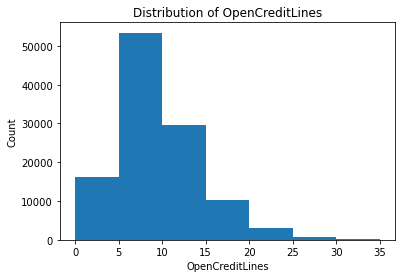

In [21]:
ocl_bin = np.arange(0,40,5)
plt.hist(df_loans['OpenCreditLines'], bins=ocl_bin);
plt.xlabel('OpenCreditLines')
plt.ylabel('Count')
plt.title('Distribution of OpenCreditLines')

The clients prefer the 5-10 range of Open Credit Lines

### Monthly Income Distribution
What is the stated monthly income of clients of Prosper Bank?

Text(0.5, 1.0, 'Distribution of Monthly Income')

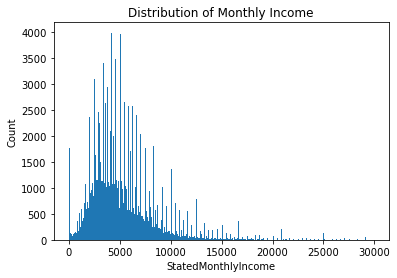

In [22]:
smi_bins = np.arange(0,30000,100)
plt.hist(data = df_loans, x = 'StatedMonthlyIncome',bins=smi_bins);
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Count')
plt.title('Distribution of Monthly Income')

The data from the visualization is skewed to the right, with a peak at $5000 which is the common stated monthly income

#### Current Credit Lines Distribution
What is the preferred current credit line for clients at Prosper Bank?

Text(0.5, 1.0, 'Distribution of CurrentCreditLines')

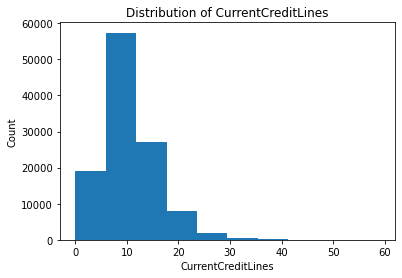

In [23]:
plt.hist(df_loans['CurrentCreditLines']);
plt.xlabel('CurrentCreditLines')
plt.ylabel('Count')
plt.title('Distribution of CurrentCreditLines')

10 is the number of curent credit lines most clients at Prosper Bank have

#### Revolving Credit Balance Distribution

What is the preferred revolving credit balance of clients at Prosper Bank?

Text(0.5, 1.0, 'Distribution of Revolving Credit Balance')

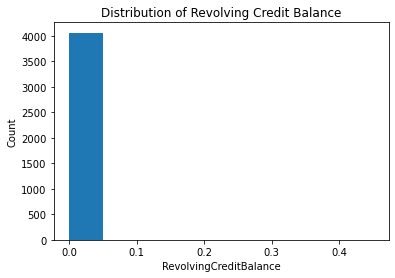

In [24]:
rcbd_bin=np.arange(0,0.5,0.05)
plt.hist(df_loans['RevolvingCreditBalance'],bins=rcbd_bin );
plt.xlabel('RevolvingCreditBalance')
plt.ylabel('Count')
plt.title('Distribution of Revolving Credit Balance')

0.05 is the revolving credit balance held by the clients of Prosper Bank

#### Open Revolving Accounts Distribution
What is the distribution of open revolving accounts?

Text(0.5, 1.0, 'Distribution of OpenRevolvingAccounts')

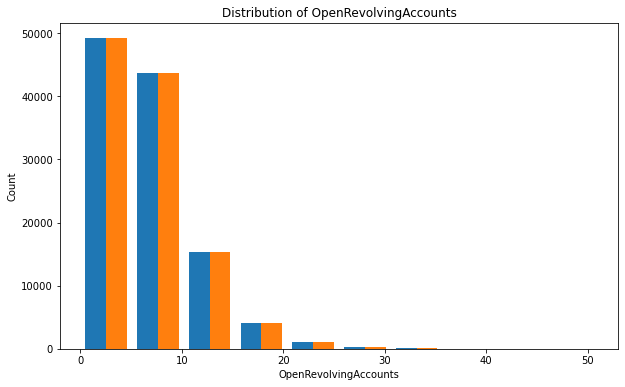

In [25]:
plt.figure(figsize=[10,6])
plt.hist(df_loans['OpenRevolvingAccounts']);
plt.xlabel('OpenRevolvingAccounts')
plt.ylabel('Count')
plt.title('Distribution of OpenRevolvingAccounts')

The highest number of Open Revolving Accounts is in the 1 - 9 range and is the preferred range by the bthe clients at Prosper Bank

### The Original Loan Amount

What is the highest range of the original amount of loans taken out by clients of Prosper Bank?

Text(0.5, 1.0, 'Distribution of LoanOriginalAmount')

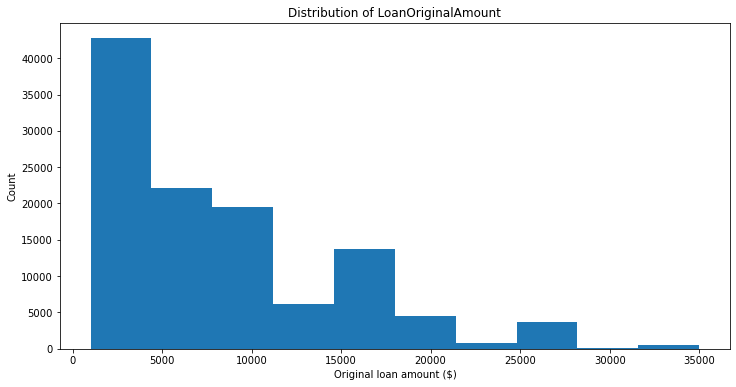

In [26]:
# Loan Original Amount distribution
plt.figure(figsize=[12,6])
plt.hist(df_loans['LoanOriginalAmount']);
plt.xlabel('Original loan amount ($)')
plt.ylabel('Count')
plt.title('Distribution of LoanOriginalAmount')

Most clients take out loans of 5k dollars and second preferred loan amount is 10k dollars and the third is 15k dollars. Most loans taken out by clients are in multiples of 5k

#### Inquiries in the last 6 months Distribution
What is the highest range of Inquiries in the last 6 months?

Text(0.5, 1.0, 'Distribution of Inquiries in the last 6 months')

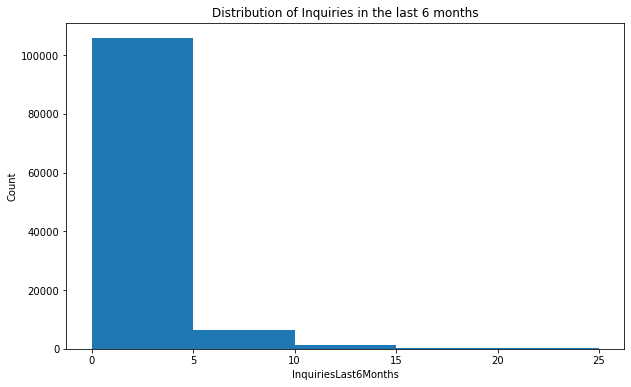

In [27]:
lm_bins = np.arange(0,30,5)
plt.figure(figsize=[10,6])
plt.hist(df_loans['InquiriesLast6Months'],bins=lm_bins)
plt.xlabel('InquiriesLast6Months')
plt.ylabel('Count')
plt.title('Distribution of Inquiries in the last 6 months')

0 - 5 is the highest range of Inquiries in the last  months

### Current Delinquencies Distribution
What is the highest range of current delinquencies?

Text(0.5, 1.0, 'Distribution of CurrentDelinquencies')

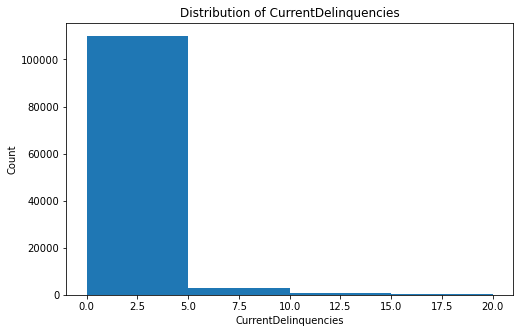

In [28]:
cd_bins = np.arange(0,25,5)
plt.figure(figsize=[8,5])
plt.hist(df_loans['CurrentDelinquencies'],bins=cd_bins);
plt.xlabel('CurrentDelinquencies')
plt.ylabel('Count')
plt.title('Distribution of CurrentDelinquencies')

0 - 5 is the highest range of current delinquencies 

#### Income Verifiable Distribution
Is the income of clients of Prosper Bank verifiable?

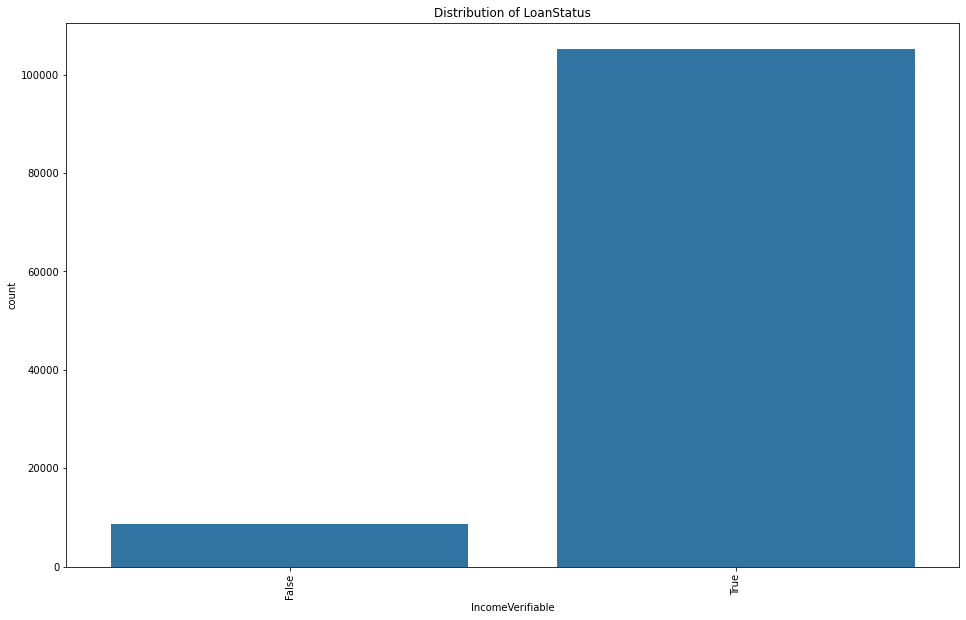

In [29]:
plt.figure(figsize=[16,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'IncomeVerifiable',color=default_color).set(title='Distribution of LoanStatus');
plt.xticks(rotation=90);

100000 clients of Prosper Bank have verifiable incomes which is the largest portion

#### Loan Status Distribution
Which is the most common loan status in Prosper Bank?

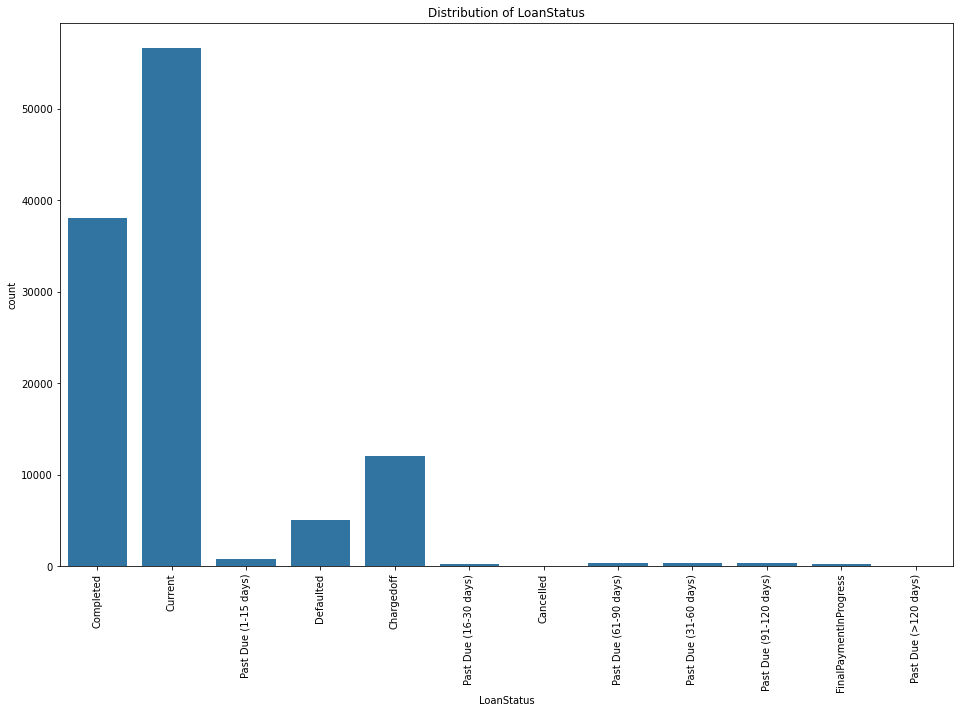

In [30]:
plt.figure(figsize=[16,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'LoanStatus',color=default_color).set(title='Distribution of LoanStatus');
plt.xticks(rotation=90);

Current is the most common loan status at Prosper Bank, followed closely by Completed

In [31]:
#Ordering the categories in Employment Status
employ_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
employ_var = pd.api.types.CategoricalDtype(ordered = True,categories = employ_order)
df_loans['EmploymentStatus'] = df_loans['EmploymentStatus'].astype(employ_var)


#### Employment Status Distribution
Which is the most common Employment Status in Prosper Bank?

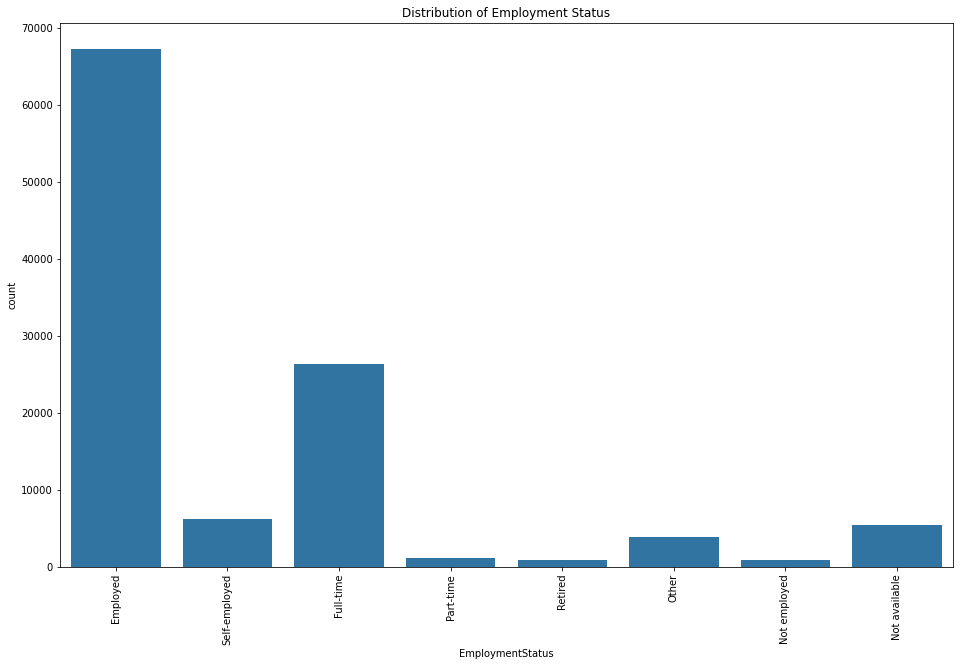

In [32]:
plt.figure(figsize=[16,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'EmploymentStatus',color=default_color).set(title='Distribution of Employment Status');
plt.xticks(rotation=90);

Most of the clients at Prosper Bank are employed, followed closely by those Full time

#### Occupation Distribution
Which is the most common occupation of clients at Prosper Bank?

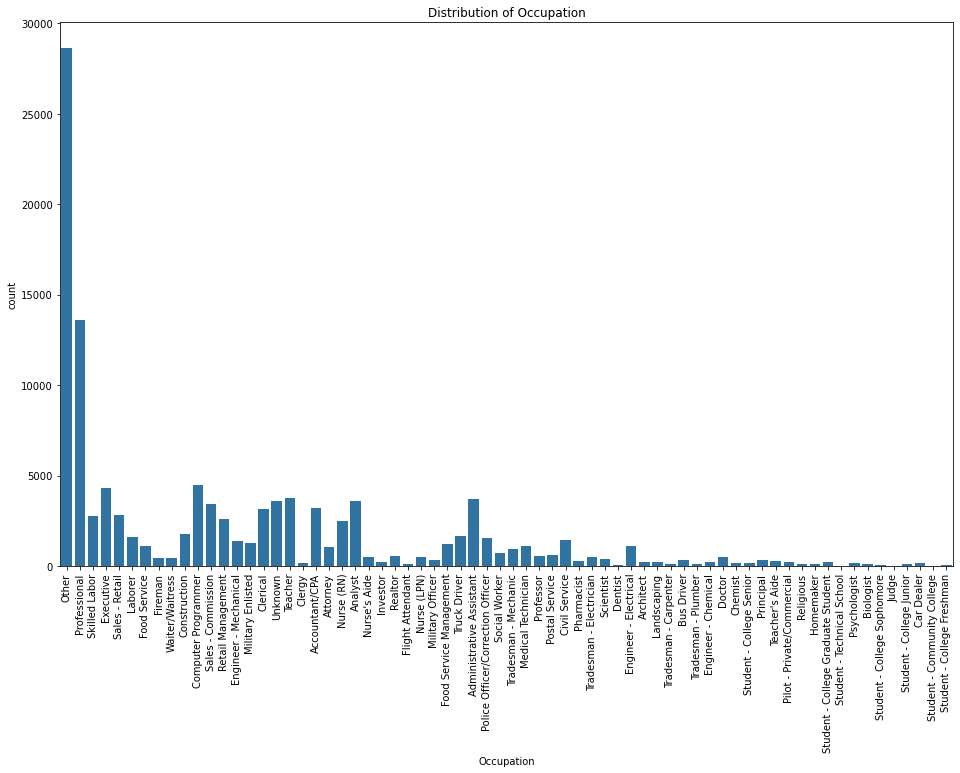

In [33]:
plt.figure(figsize=[16,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'Occupation',color=default_color).set(title='Distribution of Occupation');
plt.xticks(rotation=90);

'Other' is the most common occupation with Professional a distant 2nd

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variables of interest were Debt to Income Ratio and stated monthly income, the data had been skewed to the right and had missing values. I went ahead to fill the missing values with the mean for debt to income ratio and the median for stated monthly income as well as changing the datatypes from floats to integers



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The variables of interest were InquiresLast6Months and Current Delinquencies, the data had been skewed to the right and had missing values. I went ahead to fill the missing values with the median, as well as changing the datatypes from floats to integers. For Employment Status which is a categorical variable I re-ordered as I saw fit.

#### Debt to Income Ratio against Loan Status
What is the relation between the debt to income ratio and the loan status?

Text(0.5, 1.0, 'Scatterplot of  DebtToIncome Ratio vs Loan Status')

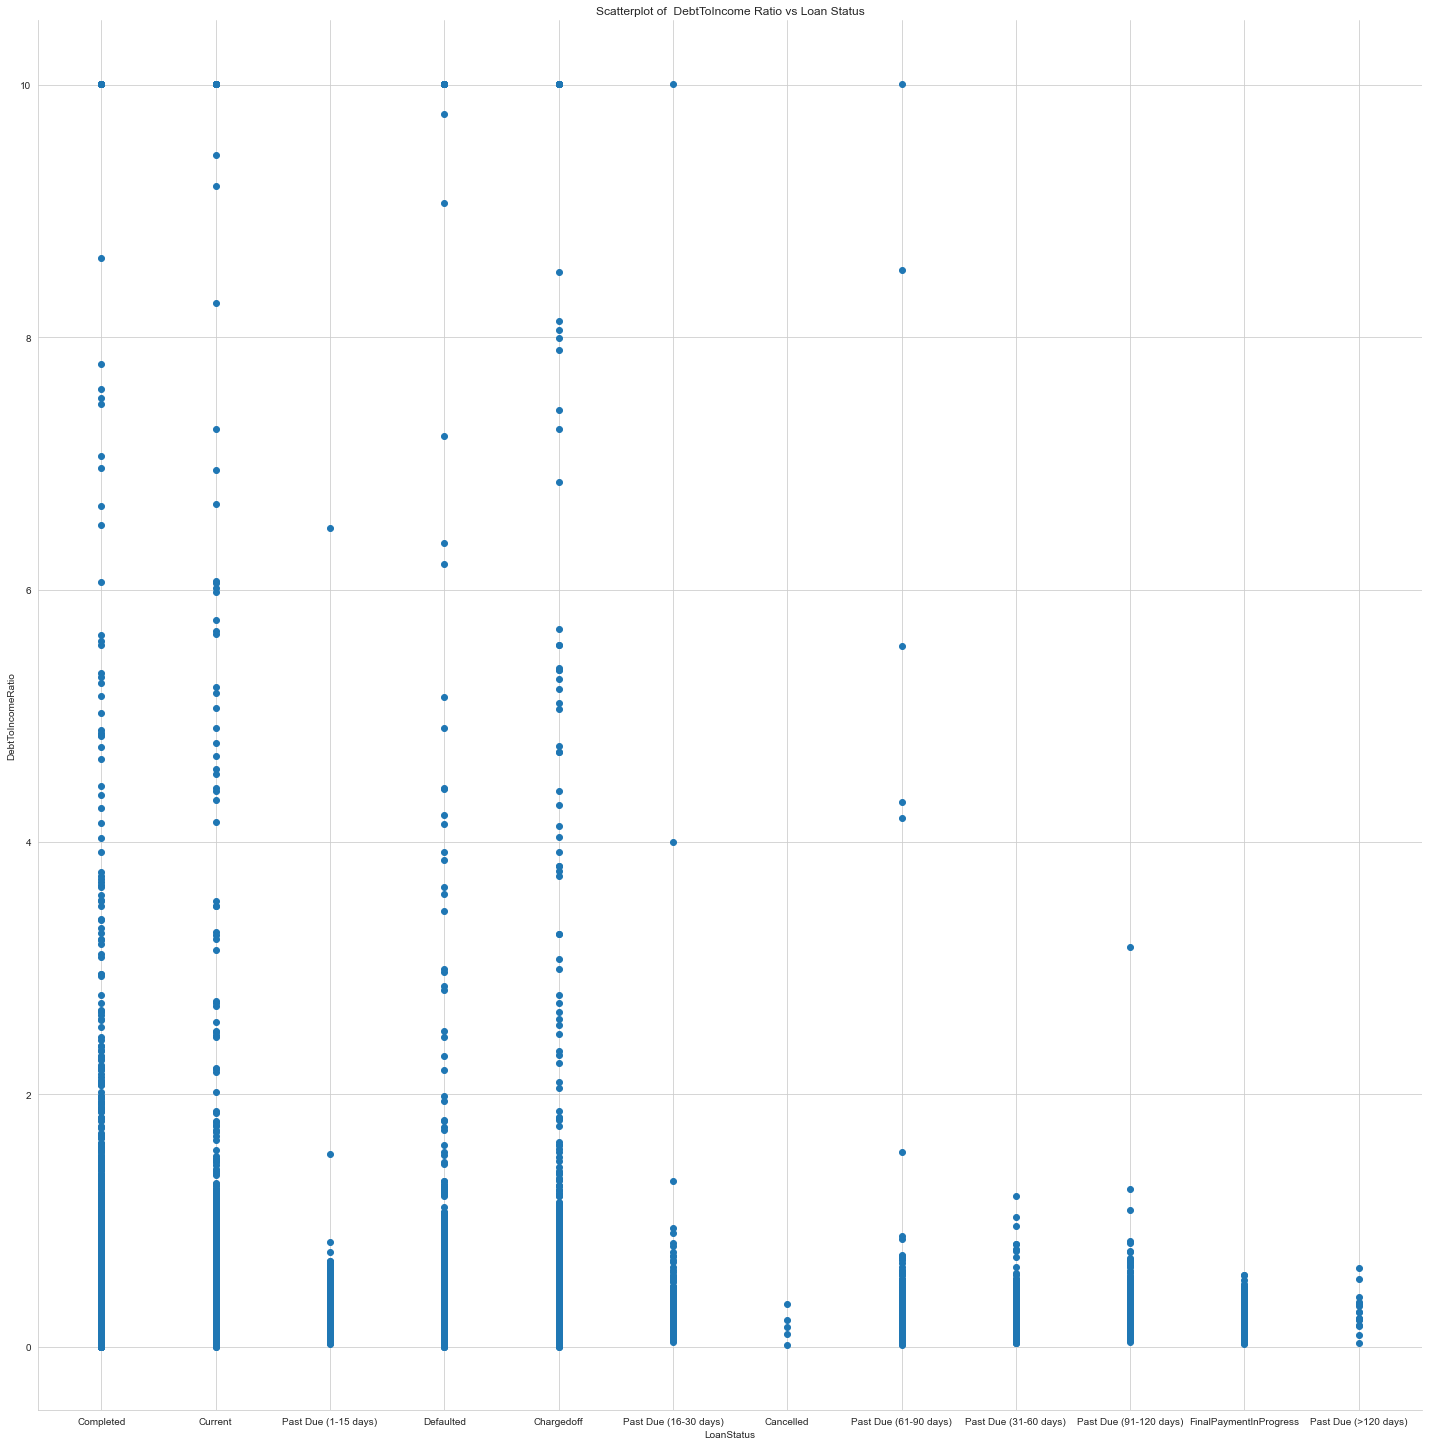

In [34]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,height=20).map(plt.scatter,'LoanStatus','DebtToIncomeRatio').add_legend()
plt.title('Scatterplot of  DebtToIncome Ratio vs Loan Status')

There is a strong correlation between completed loan statuses and the 1:4 debt to income ratio, which shows most clients within this ratio take out and complete the loan payment.

#### Current Delinquencies vs Loan Status
What is the relation between current delinquencies and loan status?

Text(0.5, 1.0, 'Scatterplot of  Current Delinquencies vs Loan Status')

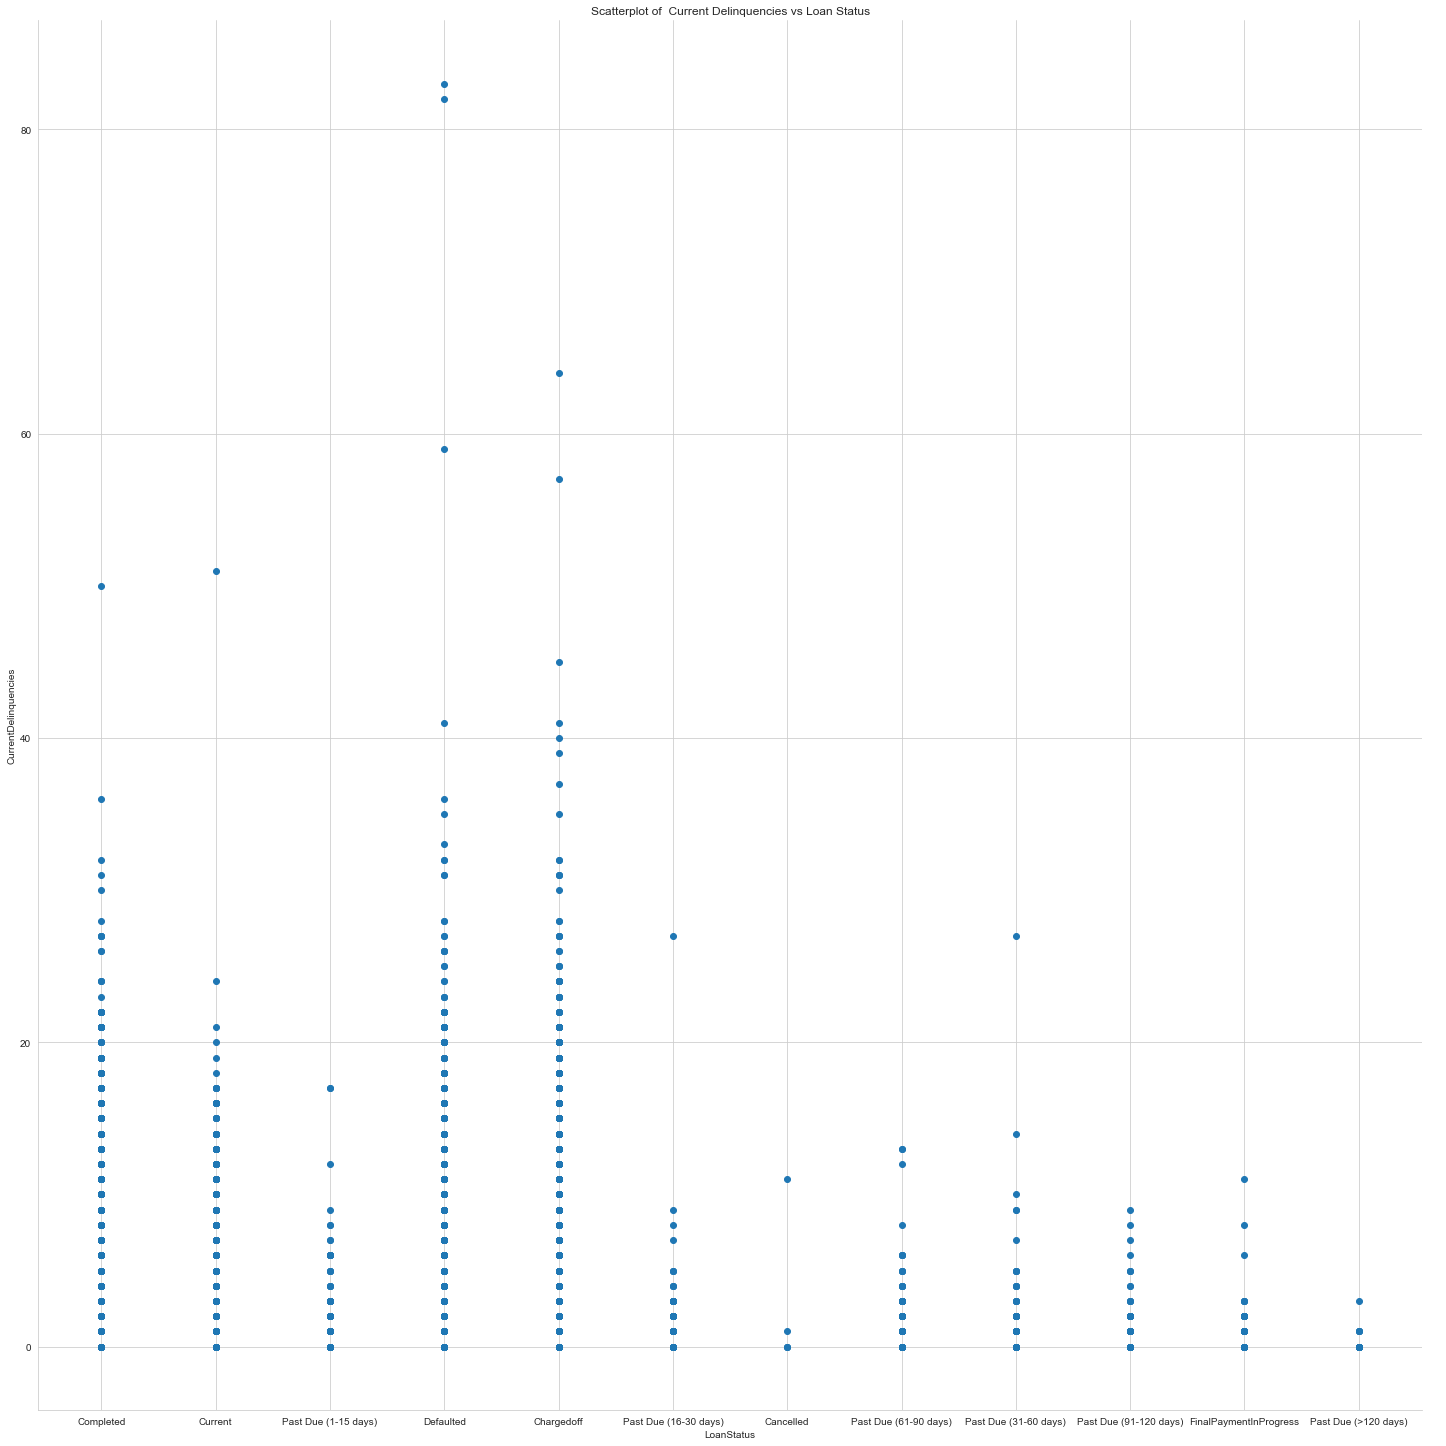

In [35]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,height=20).map(plt.scatter,'LoanStatus','CurrentDelinquencies').add_legend()
plt.title('Scatterplot of  Current Delinquencies vs Loan Status')

Most of the current delinquencies of accounts have their loans charged off as that is where the strongest correlation lies, 

#### Amount Delinquent vs Loan Original Amount
What is the relation between amount delinquent and the original amount of the loan

Text(0.5, 1.0, 'LinePlot Amount Delinnquent vs Loan Original Amount')

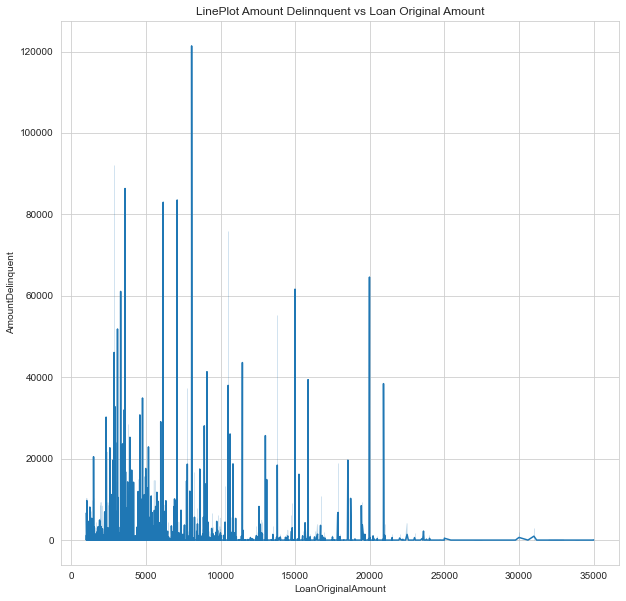

In [36]:
plt.figure(figsize = [10, 10])
sb.lineplot(data = df_loans, y = 'AmountDelinquent', x = 'LoanOriginalAmount');
plt.title('LinePlot Amount Delinnquent vs Loan Original Amount')

The original loan amounts in the range of 5,000 dollars - 10,000 dollars attracts the highest amount delinquent of $120,000

#### Stated Monthly Income vs Loan Status
What is the relation between stated monthly income and loan status?

Text(0.5, 1.0, 'LinePlot of Stated Monthly Income against Loan Status')

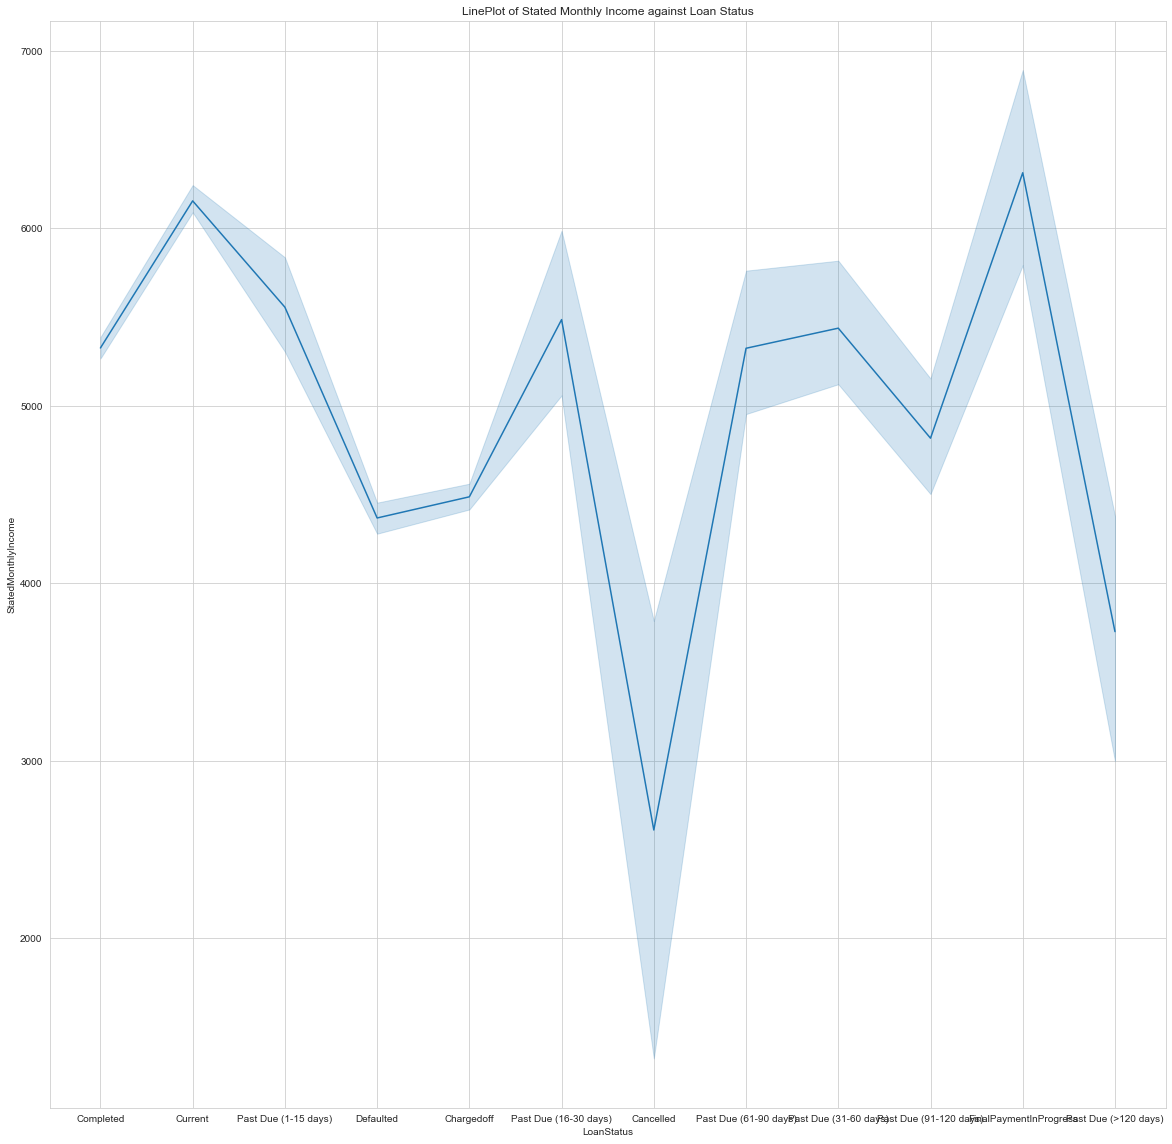

In [37]:
plt.figure(figsize= [20,20])
sb.lineplot(data=df_loans,y='StatedMonthlyIncome',x='LoanStatus')
plt.title('LinePlot of Stated Monthly Income against Loan Status')

Clients of Prosper Bank with 2800 dollars stated monthly income had their loan status cancelled whereas  clients with stated monthly incomes of 6200 dollars have loan status' of Payment in progress

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Loan Status is the feature of focus in this study as we try to figure out which factors affect this feature. Debt to Income ratio, there is a strong correlation between completed loan statuses and the 1:4 debt to income ratio, which shows most clients within this ratio take out and complete the loan payment. This outcome should encourage the bank to market their loan service to clients who prefer this range for maximum profit on this finanicial product.

With regards to Stated Monthly Income, clients of Prosper Bank with 2800 dollars stated monthly income had their loan status cancelled whereas clients with stated monthly incomes of 6200 dollars have loan status' of Payment in progress. This shows that clients with higher incomes are likely to pay back their loans which calls for the bank to market their loan products to this customer segment.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Clients of Prosper Bank with 2800 dollars stated monthly income had their loan status cancelled whereas  clients with stated monthly incomes of 6200 dollars have loan status' of Payment in progress

## Multivariate Exploration


#### DebtTo Income Ratio, Income Verifiable and LoanStatus
What is the relation among Debt to Income Ratio, Income Verifiable and Loan Status?

Text(0.5, 1.0, 'Scatterplot of  DebtToIncome, IncomeVerifiable Ratio vs Loan Status')

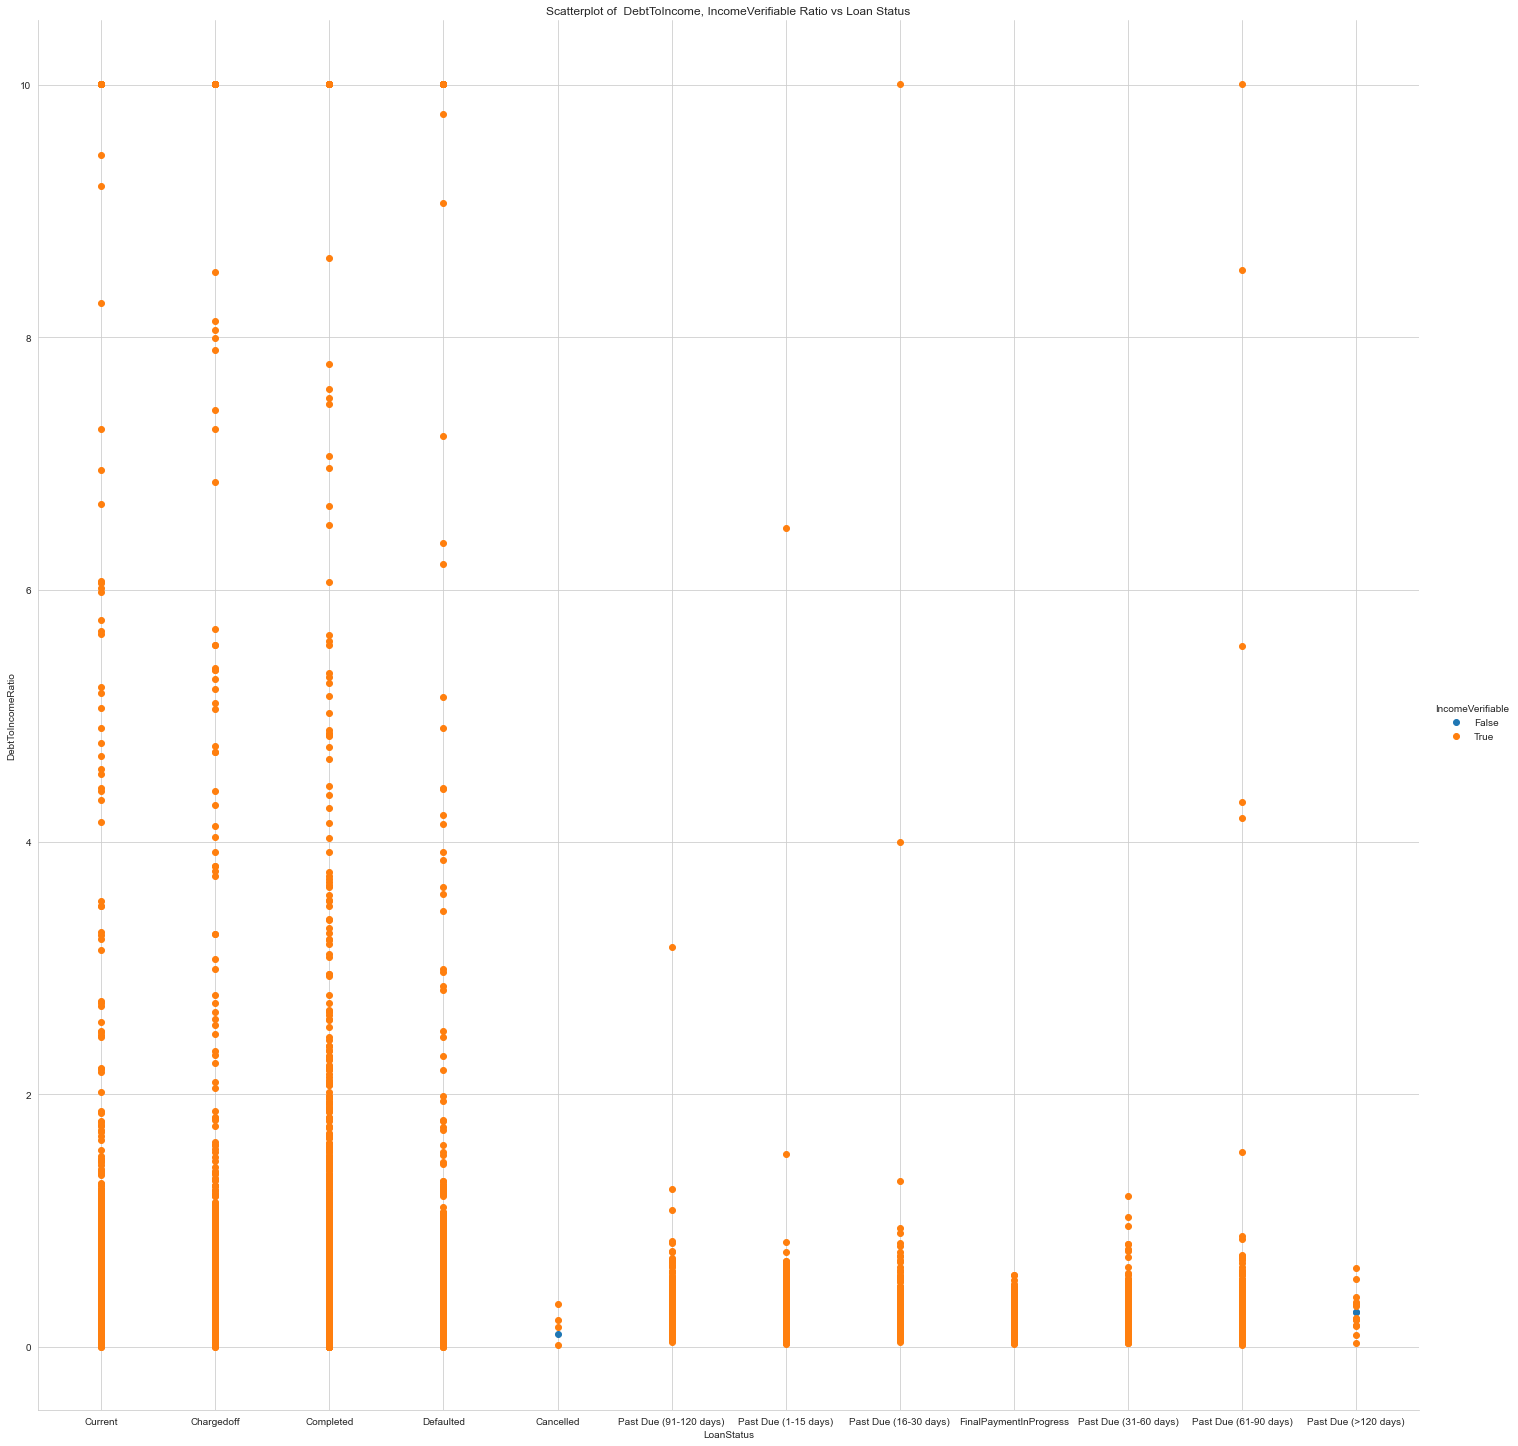

In [38]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,hue='IncomeVerifiable',height=20).map(plt.scatter,'LoanStatus','DebtToIncomeRatio').add_legend()
plt.title('Scatterplot of  DebtToIncome, IncomeVerifiable Ratio vs Loan Status')

Few clients of the bank had no verifiable income which is for business, they fall in the categories of Cancelled and Past due by 120 days which explains the case. 
There is a strong correlation among DebtTo Income Ratio, Income Verifiable and LoanStatus as evidenced by the completed Loan Status which shows most of the clients at the 1:4 debt to income ratio have verifiable incomes and are able to complete loan payments

#### Stated Monthly Income, Homeownership of Borrower and Loan Status
What is the relation among Stated Monthly Income, Homeownership of Borrower and Loan Status?

Text(0.5, 1.0, 'Scatterplot of  Is Borrower Homeowner, Stated Monthly Income vs Loan Status')

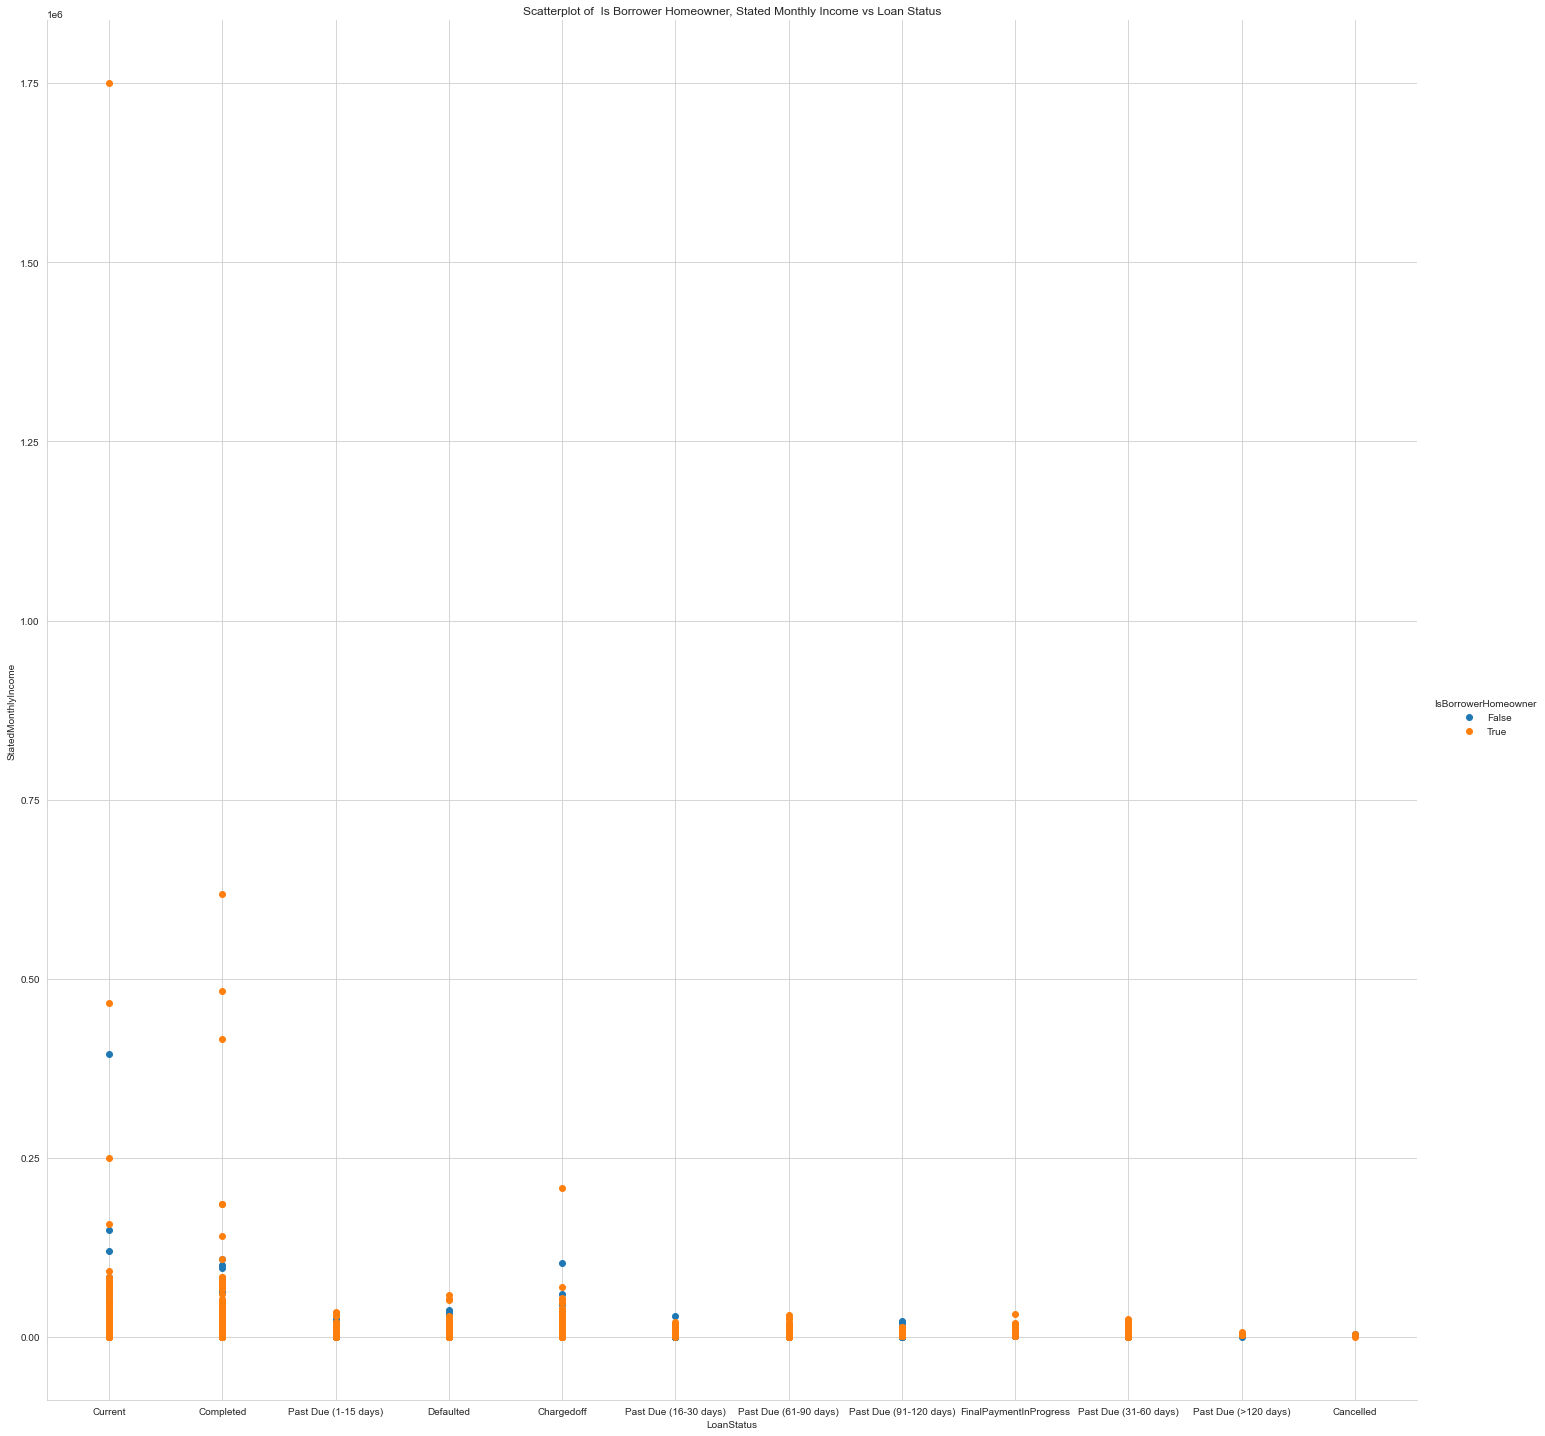

In [39]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,hue='IsBorrowerHomeowner',height=20).map(plt.scatter,'LoanStatus','StatedMonthlyIncome').add_legend()
plt.title('Scatterplot of  Is Borrower Homeowner, Stated Monthly Income vs Loan Status')

Most of Prosper Bank's clients are home owners and few of them are not however this does not impede their ability to pay loans. Most of the clients with the 3 factors, Stated Monthly Income, Homeownership of Borrower and Loan Status, are able to complete their loan payments. Their is an outlier at 1.75, current.

#### Borrower Homeownership, LoanOriginal vs Loan Status
What is the relation among Borrower Homeownership, LoanOriginal vs Loan Status?

Text(0.5, 1.0, 'Scatterplot of  Is Borrower Homeowner, LoanOriginal vs Loan Status')

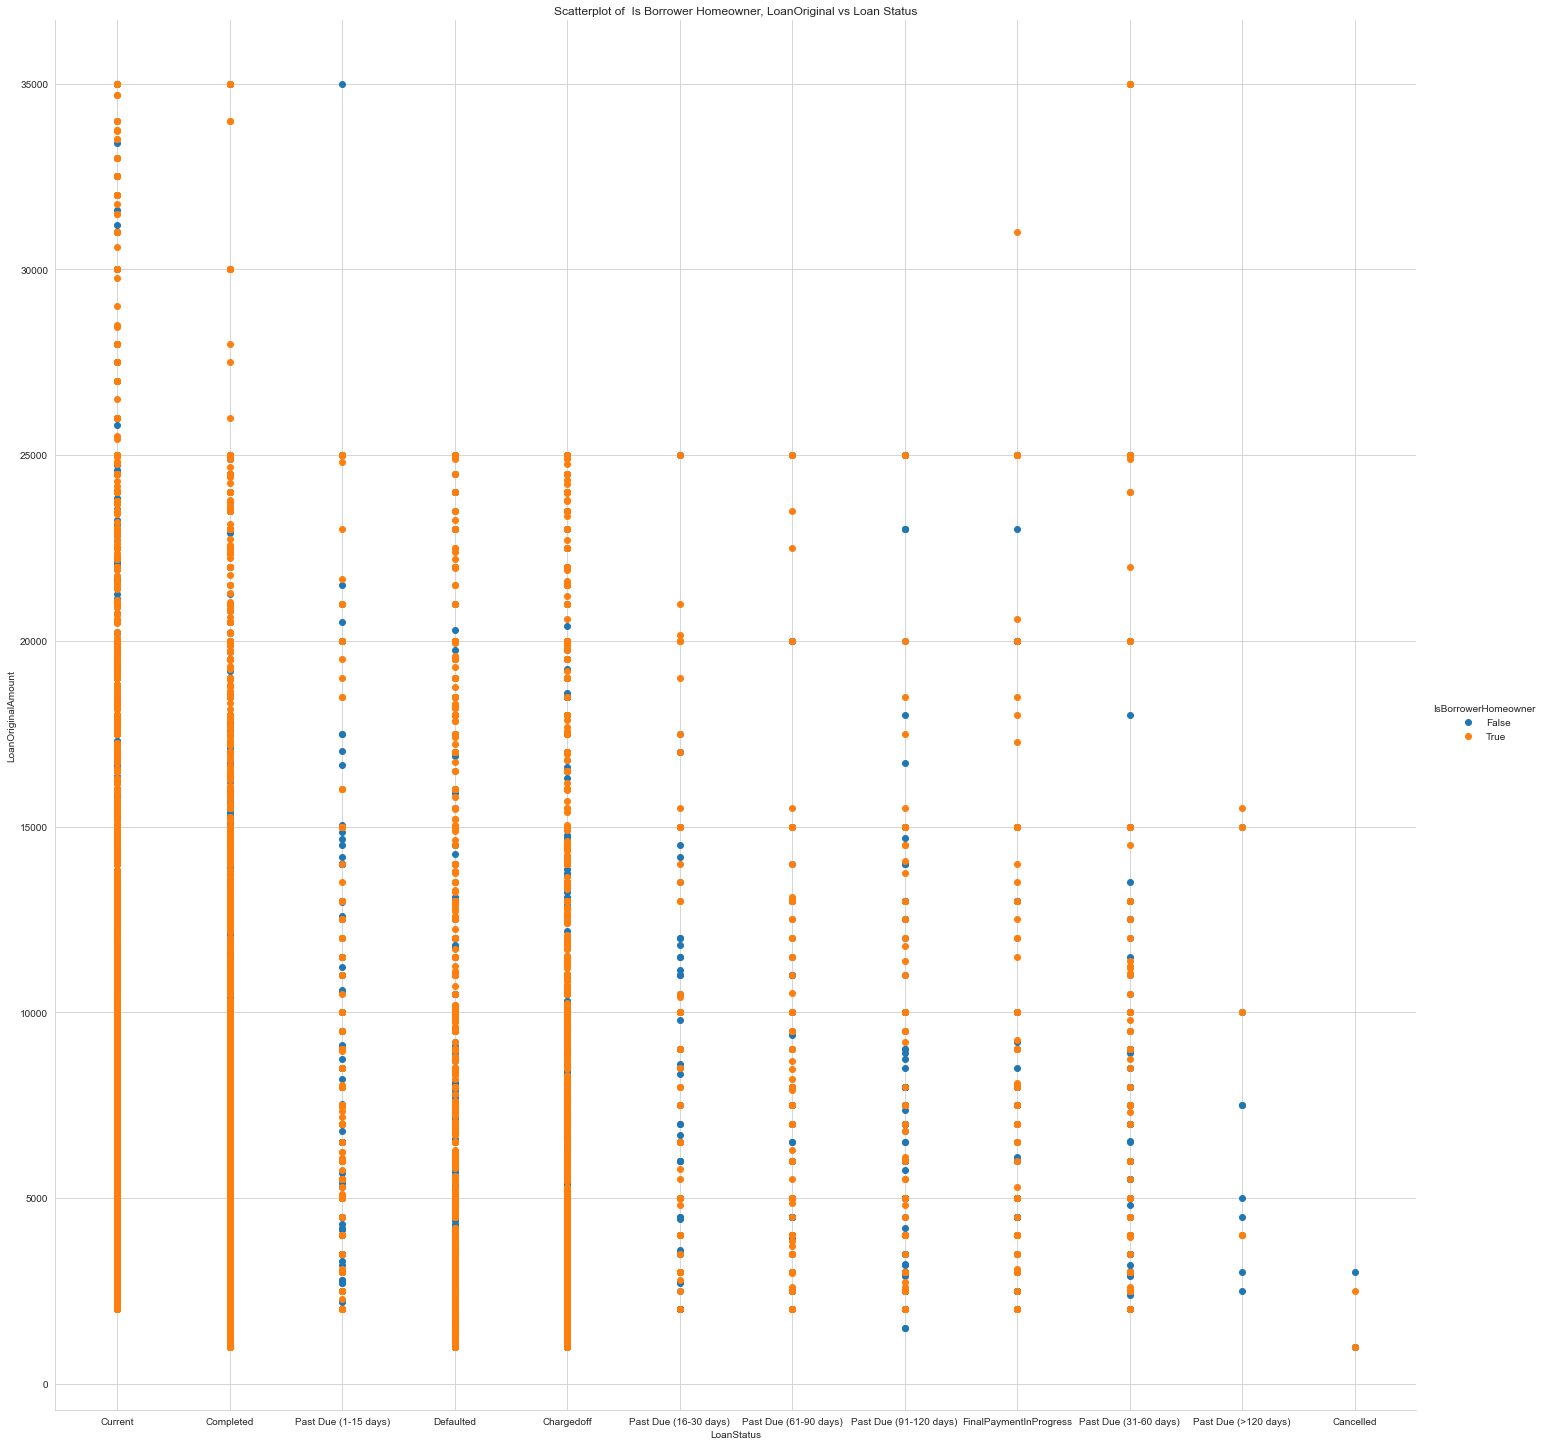

In [40]:
sb.set_style('whitegrid')
sb.FacetGrid(df_loans,hue='IsBorrowerHomeowner',height=20).map(plt.scatter,'LoanStatus','LoanOriginalAmount').add_legend()
plt.title('Scatterplot of  Is Borrower Homeowner, LoanOriginal vs Loan Status')


There is a strong correlation among Borrower Homeownership, LoanOriginal and Loan Status at the Current Loan Status which goes to show more clients who own their own homes take out more loans and loans of high amounts. The home serves as a good security for loans and should they default the loan can be recoverd from that security. Home ownership is a good indicater that the client can pay a loan and thus why they take out more loans and high amounts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Income Verifiable feature strengthened debt to income and Loan status
Few clients of the bank had no verifiable income which is for business, they fall in the categories of Cancelled and Past due by 120 days which explains the case. 
There is a strong correlation among DebtTo Income Ratio, Income Verifiable and LoanStatus as evidenced by the completed Loan Status which shows most of the clients at the 1:4 debt to income ratio have verifiable incomes and are able to complete loan payments

### Were there any interesting or surprising interactions between features?
Homeownership as a suprising feature because lack of it does not impede payments to a high degree.
There is a strong correlation among Borrower Homeownership, LoanOriginal and Loan Status at the Current Loan Status which goes to show more clients who own their own homes take out more loans and loans of high amounts. The home serves as a good security for loans and should they default the loan can be recoverd from that security. Home ownership is a good indicater that the client can pay a loan and thus why they take out more loans and high amounts.

## Conclusions
Prosper Bank should look into debt to income ratio and stated monthly income as metrics to gauge the loan status of thier clients. They should then look into the customer segments that will be found such as high income earners and market their loan products to them and provide incentives to attract and keep that clientele.

The main conclusion is that Prosper Bank should use the factors that affect loan outcomes as a strategy to segment clientele and over a variety of loan products that are tailored to suit the segments. For example from the analysis clients with low stated monthly incomes have most of their loans cancelled which is bad for business. They can turn this around by tailoring a loan product to suit low income earners which will incentivise them to pay their loans and attract other low income earners and bring profit to Prosper Bank.


In [6]:
#The final and cleaned dataset
df_loans.to_csv('ProsperLoanData_cleaned.csv')